In [96]:
import nltk
import string
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import log
import random



MUT = 0.5  # Hyper Parameter for Randomization Rate

# Download the NLTK packages for tokenization
#nltk.download('punkt_tab')
#nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('imdb dataset.csv')


# Data Preprocessing
## Dividing data into Training (4/5) & Testing (1/5)

In [21]:
# Preprocess the sentences
sent = list(df['review'])
view = list(df['sentiment'])

trg_size = int((4/5)*len(sent))

# Split the dataset into training and testing sets
trg_sent = sent[:trg_size]  
trg_view = view[:trg_size]

tst_sent = sent[trg_size:]
tst_view = view[trg_size:]

40000


10000

# Vocabulary & Frequency

In [3]:
def token_count(tokens):
    count = {}
    for token in tokens:
        if token in count:
            count[token] += 1
        else:
            count[token] = 1
    return count


## Converting to lowercase
## Removing HTML breaks
## Removing punctuation

## Converting to Unigrams, Bigrams & Trigrams Vocabulary

In [69]:
# stop words for English
stop_words = set(stopwords.words("english"))
pos_prob=0
neg_prob=0


# All Sentence tokens
words = list()
bigrams = list()
trigrams = list()

neg_words=list()
pos_words=list()

for i,s in enumerate(trg_sent):
    senti = view[i]
    s = s.lower()
    s = s.replace('<br />', ' ')  # Remove HTML line breaks
    s = s.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    s = sent_tokenize(s)

    for i in s:
        w = (nltk.word_tokenize(i)) 
        
        bigrams.extend(list(nltk.ngrams(w, 2)))
        trigrams.extend(list(nltk.ngrams(w, 3)))

        words.extend(w)
        if senti == 'positive':
            pos_prob+=1
            pos_words.extend(w)
        else:
            neg_prob+=1
            neg_words.extend(w)

uni_vocab = token_count(words)
pos_vocab = token_count(pos_words)
neg_vocab = token_count(neg_words)

pos_prob = pos_prob/len(sent)
neg_prob = neg_prob/len(sent)

pos_token_count = len(pos_words)
neg_token_count = len(neg_words)

bi_vocab = token_count(bigrams)
tri_vocab = token_count(trigrams)


print("Unigram Vocabulary")
print("All Vocab:", len(uni_vocab))
print("Positive Tokens:", pos_token_count)
print("Negative Tokens:", neg_token_count)

print("Bigram Vocabulary", len(bi_vocab))
print("Trigram Vocabulary", len(tri_vocab))


Unigram Vocabulary
All Vocab: 147834
Positive Tokens: 4588287
Negative Tokens: 4522407
Bigram Vocabulary 2059703
Trigram Vocabulary 5421008


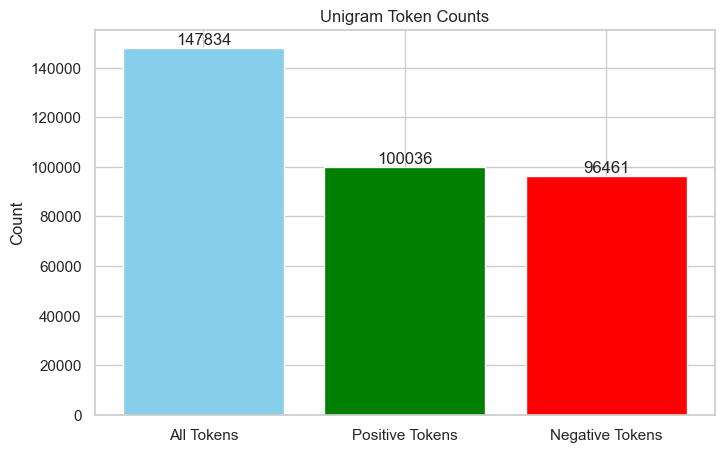

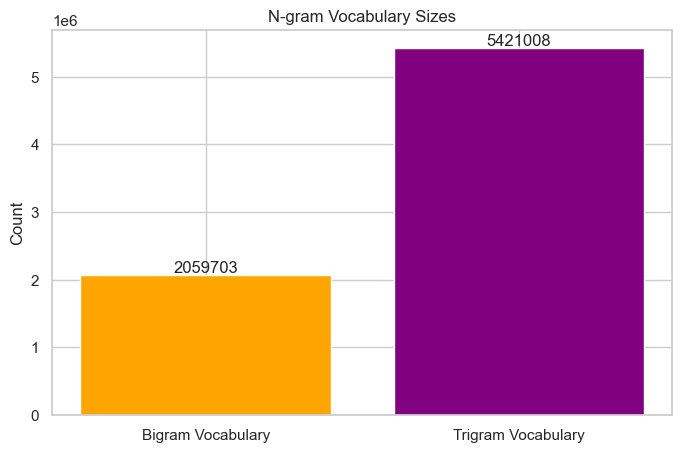

In [108]:
def plot_token_info(uni_vocab, pos_token_count, neg_token_count, bi_vocab, tri_vocab):
    # Set up a style for the graphs
    sns.set(style="whitegrid")

    # Bar plot for Unigram Vocabulary
    plt.figure(figsize=(8, 5))
    unigram_labels = ['All Tokens', 'Positive Tokens', 'Negative Tokens']
    unigram_values = [len(uni_vocab), len(pos_token_count), len(neg_token_count)]
    
    bars = plt.bar(unigram_labels, unigram_values, color=['skyblue', 'green', 'red'])
    plt.ylabel('Count')
    plt.title('Unigram Token Counts')

    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 100, yval, ha='center', va='bottom')
    
    plt.show()

    # Bar plot for Bigram and Trigram Vocabulary
    plt.figure(figsize=(8, 5))
    ngram_labels = ['Bigram Vocabulary', 'Trigram Vocabulary']
    ngram_values = [len(bi_vocab), len(tri_vocab)]
    
    bars = plt.bar(ngram_labels, ngram_values, color=['orange', 'purple'])
    plt.ylabel('Count')
    plt.title('N-gram Vocabulary Sizes')
    
    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 100, yval, ha='center', va='bottom')

    plt.show()

plot_token_info(uni_vocab, pos_vocab, neg_vocab, bi_vocab, tri_vocab)


# Unigram Model


In [79]:
def unigram_model(sent,tokens,third=None):
    next,_ = max(tokens.items(), key=lambda x: x[1])
    if random.random() < MUT:
        next = random.choice(list(tokens.keys()))

    return next
demo_sent = "I am"
print(unigram_model(demo_sent,uni_vocab))

hoffmans


# Bigram Model

In [87]:
def bigram_model(sent,bigram_vocab,unigram_vocab):
    sent = sent.split()
    pos_words = list()
    if len(sent) == 0:
        return unigram_model(sent,unigram_vocab)    
    prev = sent[-1]
    max = 0
    for word,freq in bigram_vocab.items():
        if word[0] == prev:
            pos_words.append(word[1])
            if freq > max:
                max = freq
                next = word[1]

    if len(pos_words) == 0:   # random word if no other found
        return unigram_model(sent,unigram_vocab)
    if random.random() < MUT: # chance of random word selection from possible bigrams
        next = random.choice(pos_words)
     
    return next


demo_sent = "I am a"
print(bigram_model(demo_sent,bi_vocab,uni_vocab))

drop


# Trigram Model

In [93]:
def trigram_model(sent,trigram_vocab,unigram_vocab):
    sent = sent.split()
    pos_words = list()
    if len(sent) == 0:
        return unigram_model(sent,unigram_vocab)    
    prev1,prev2 = sent[-2:]
    max = 0
    next = ''
    for word,freq in trigram_vocab.items():
        if word[0] == prev1 and word[1] == prev2:
            pos_words.append(word[2])
            if freq > max:
                max = freq
                next = word[2] 
    
    if len(pos_words) == 0:
        return unigram_model(sent,unigram_vocab)
    if random.random() < MUT:
        next = random.choice(pos_words)
    
    return next

demo_sent = "I am not to be able to be"
print(bigram_model(demo_sent,tri_vocab,uni_vocab))

a


# Sentence Generator

In [98]:
def generate_sentence(model, seed,uni_vocab, model_vocab, n):
    sent = seed
    for i in range(n):
        next = model(sent,model_vocab,uni_vocab)
        sent += ' ' + next
    return sent


print(generate_sentence(bigram_model, "The movie", uni_vocab, bi_vocab, 30))
print(generate_sentence(trigram_model, "The movie", uni_vocab, tri_vocab, 30))


The movie is reputedly has fun to the covered in families and mailbox when i was gonzos waterstunt display more than displaying the ignition with our hero takes place in danny devito
The movie circumspect outriders burdening the the relationship between dane and steves characters in the okinawa high school and reveals shaven underarms not the ambiguous ending director schmidt does display touches of


# Classifier

##### Using Multinomial Naive Bayes Algorithim
##### Add one smoothing
##### Ignoring words not in Vocab

In [33]:
def classifier(sentence,uni_vocab,pos_vocab,neg_vocab,pos_prob,neg_prob):
    words = list()
    s = sentence.lower()
    s = s.replace('<br />', ' ')  # Remove HTML line breaks
    s = s.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    s = sent_tokenize(s)

    for i in s:
        w = (nltk.word_tokenize(i)) 
        words.extend(w)

    words = [word for word in words if word in uni_vocab.keys()]
    pos = 0
    neg = 0
    
    for word in words:
        
        if word in pos_vocab:
            pos += log((pos_vocab[word]+1) / (pos_token_count+len(uni_vocab)))
        else:
            pos += log(1 / (pos_token_count+len(uni_vocab)))
        
        if word in neg_vocab:
            neg += log((neg_vocab[word]+1) / (neg_token_count+len(uni_vocab)))
        else:
            neg += log(1 / (neg_token_count+len(uni_vocab)))
    
    pos += log(pos_prob)
    neg += log(neg_prob)
    
    if pos > neg:
        return 'positive',pos
    else:    
        return 'negative',neg
    

# Function to Evaluate Classifier

In [34]:
def model_evaluation(tst_sent,tst_view,uni_vocab,pos_vocab,neg_vocab,pos_prob,neg_prob):
    
    tn = 0
    tp = 0
    fn = 0
    fp = 0

    for i,s in enumerate(tst_sent):
        pred,prob = classifier(s,uni_vocab,pos_vocab,neg_vocab,pos_prob,neg_prob)
        if pred == tst_view[i] and pred == 'positive':
            tp += 1
        elif pred == tst_view[i] and pred == 'negative':
            tn += 1
        elif pred != tst_view[i] and pred == 'positive':
            fp += 1
        else:
            fn += 1
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2*(precision*recall)/(precision+recall)

    met = dict()
    met['tn']= tn
    met['tp']= tp
    met['fn']= fn
    met['fp']= fp
    met['accuracy'] = accuracy
    met['precision'] = precision
    met['recall'] = recall
    met['f1'] = f1

    return met

# Function to Plot info in a meaningful way
def plot_confusion_matrix(met):
    cm = np.array([[met['tn'], met['fp']],
                   [met['fn'], met['tp']]])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot Accuracy, Precision, Recall, and F1 as a bar chart
    labels = ['Accuracy', 'Precision', 'Recall', 'F1']
    values = [met['accuracy'], met['precision'], met['recall'], met['f1']]
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=['skyblue', 'orange', 'green', 'red'])
    plt.ylim(0, 1)  # Since these metrics range between 0 and 1
    
    # Add value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')
    
    plt.ylabel('Value')
    plt.title('Performance Metrics')
    plt.show()


{'tn': 4398, 'tp': 4072, 'fn': 935, 'fp': 595, 'accuracy': 0.847, 'precision': 0.8725091064923934, 'recall': 0.8132614339924106, 'f1': 0.8418441182551168}


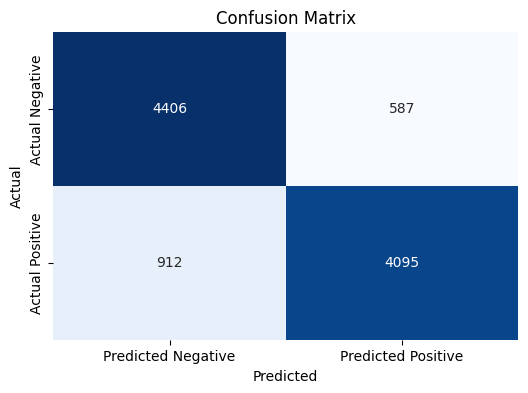

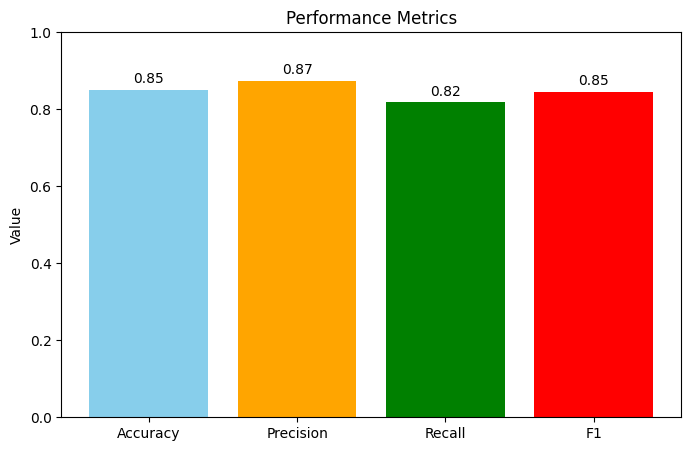

In [105]:
met = model_evaluation(tst_sent,tst_view,uni_vocab,pos_vocab,neg_vocab,pos_prob,neg_prob)
plot_confusion_matrix(met)
